Statistical Theory - Final Project : Student Alcohol Consumption


Authors: Shilo Avital & Sarel Lieberman

Date:    10.7.2025

Python:  3.11

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

seed=42  # for reproducibility

In [2]:
# Plotting style
plt.rcParams.update({
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
})

In [3]:
def save_figure(fig, filename: Path):
    """Save and close a matplotlib figure."""
    fig.tight_layout()
    fig.savefig(filename, bbox_inches='tight')
    plt.close(fig)
    print(f"[FIG] Saved → {filename}")

In [4]:
def question_1(df, fout):
    """Q1 - Alcohol consumption vs grades."""
    fout.write("Q1: Alcohol consumption vs grades\n")

    # Pearson correlation
    r, p = stats.pearsonr(df['Walc'], df['G3'])
    fout.write(f" Pearson r (Walc vs G3) = {r:.3f},  p = {p:.4g}\n")

    # Perform ANOVA
    model = smf.ols('G3 ~ C(Walc)', data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    fout.write(" ANOVA on G3 ~ C(Walc):\n")
    fout.write(anova.to_string()); fout.write("\n\n")

    # Tukey's HSD post hoc test
    tukey = pairwise_tukeyhsd(endog=df['G3'], groups=df['Walc'], alpha=0.05)
    fout.write(" Tukey HSD results:\n")
    fout.write(str(tukey)); fout.write("\n\n")

    df['Walc'] = df['Walc'].astype(int)
    frequent_drinkers = df[df['Walc'] > 3]['G3']
    non_frequent_drinkers = df[df['Walc'] <= 3]['G3']
    u_statistic, p_value = stats.mannwhitneyu(
    frequent_drinkers, non_frequent_drinkers, alternative="less"
    )
    fout.write(f"\nQ1: U-statistic: {u_statistic:.4f}, P-value: {p_value:.6f}\n")
    if p_value < 0.05:
        fout.write("Conclusion: There is a significant difference in G3 between frequent and non-frequent drinkers.\n")
    else:
        fout.write("Conclusion: No significant difference in G3 between groups.\n")
    

    fig, ax = plt.subplots(figsize=(4.2, 3))
    sns.boxplot(data=df, x='Walc', y='G3', hue='Walc', palette='Blues', ax=ax, legend=False)
    ax.set_xlabel("Weekend alcohol use (1 = none … 5 = heavy)")
    ax.set_ylabel("Final grade (G3)")
    ax.set_title("Grades by weekend alcohol use")
    save_figure(fig, Path("figures/Q1_G3_Walc_boxplot.png"))

    # plot a scatter plot with regression line for all the data
    fig, ax = plt.subplots(figsize=(4.2, 3))
    sns.regplot(data=df, x='Walc', y='G3', ax=ax, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    ax.set_xlabel("Weekend alcohol use (1 = none … 5 = heavy)")
    ax.set_ylabel("Final grade (G3)")
    ax.set_title("Grades by weekend alcohol use (regression)")
    save_figure(fig, Path("figures/Q1_G3_Walc_regression.png"))

In [5]:
def question_2(df, fout):
    """Q2 - absences vs grades."""
    fout.write("Q2: absences vs grades\n")
    r, p = stats.pearsonr(df['absences'], df['G3'])
    fout.write(f" Pearson r = {r:.3f},  p = {p:.4g}\n")

    low = df[df.absences <= 5]['G3']
    high = df[df.absences >= 15]['G3']
    t, p2 = stats.ttest_ind(low, high, equal_var=False)
    fout.write(f" Welch t-test (<=5 vs >=15 absences): "
               f"t = {t:.2f}, p = {p2:.4g}\n\n")

    fig, ax = plt.subplots(figsize=(4.2, 3))
    sns.scatterplot(df, x='absences', y='G3', alpha=0.6, ax=ax)
    sns.regplot(df, x='absences', y='G3',
                scatter=False, color='red', ax=ax)
    ax.set_xlim(-1)
    ax.set_xlabel("Number of absences")
    ax.set_ylabel("Final grade (G3)")
    ax.set_title("absences vs grade")
    save_figure(fig, Path("figures/fig3_absences_scatter.png"))
    # """Q2: Is there a difference in the average final grade (G3) between students who have romantic relationships and those who do not?"""
    # df['Romantic'] = df['Romantic'].astype(int)
    # with_romantic = df[df['Romantic'] == 1]['G3']
    # without_romantic = df[df['Romantic'] == 0]['G3']
    
    # t_stat, p_value = stats.ttest_ind(with_romantic, without_romantic, equal_var=False)
    
    # fout.write(f"\nQ2: T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}\n")
    # if p_value < 0.05:
    #     fout.write("Conclusion: There is a significant difference in G3 between students with and without romantic relationships.\n")
    # else:
    #     fout.write("Conclusion: No significant difference in G3 between groups.\n")
    # Ensure figures directory exists
 

In [6]:
def question_3(df, fout):
    """Q3: Is there a difference in the average final grade (G3) between students who study more than 2 hours per day and those who study less?"""
    df['studytime'] = df['studytime'].astype(int)
    more_than_2_hours = df[df['studytime'] > 2]['G3']
    less_or_equal_2_hours = df[df['studytime'] <= 2]['G3']
    
    t_stat, p_value = stats.ttest_ind(more_than_2_hours, less_or_equal_2_hours, equal_var=False)
    
    fout.write(f"\nQ3: T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}\n")
    if p_value < 0.05:
        fout.write("Conclusion: There is a significant difference in G3 between students studying more than 2 hours and those studying less.\n")
    else:
        fout.write("Conclusion: No significant difference in G3 between groups.\n")

In [7]:

def question_4(df, fout):
    """Q4: Is there a difference in the average final grade (G3) between students who have a higher health status (health >= 3) and those who do not?"""
    df['health'] = df['health'].astype(int)
    higher_health = df[df['health'] >= 3]['G3']
    lower_health = df[df['health'] < 3]['G3']
    
    t_stat, p_value = stats.ttest_ind(higher_health, lower_health, equal_var=False)
    
    fout.write(f"\nQ4: T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}\n")
    if p_value < 0.05:
        fout.write("Conclusion: There is a significant difference in G3 between students with higher and lower health status.\n")
    else:
        fout.write("Conclusion: No significant difference in G3 between groups.\n")

def question_5(df, fout):
    # """Q2: Is there a difference in the average final grade (G3) between students who have romantic relationships and those who do not?"""
    # df['Romantic'] = df['Romantic'].astype(int)
    # with_romantic = df[df['Romantic'] == 1]['G3']
    # without_romantic = df[df['Romantic'] == 0]['G3']
    
    # t_stat, p_value = stats.ttest_ind(with_romantic, without_romantic, equal_var=False)
    
    # fout.write(f"\nQ2: T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}\n")
    # if p_value < 0.05:
    #     fout.write("Conclusion: There is a significant difference in G3 between students with and without romantic relationships.\n")
    # else:
    #     fout.write("Conclusion: No significant difference in G3 between groups.\n")
    # Ensure figures directory exists
    """Q5 - health rating vs grade."""
    fout.write("Q5: health rating vs grades\n")
    rho, p = stats.spearmanr(df['health'], df['G3'])
    fout.write(f" Spearman ρ = {rho:.3f},  p = {p:.4g}\n")

    model = smf.ols('G3 ~ C(health)', data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    fout.write(" ANOVA health:\n")
    fout.write(anova.to_string()); fout.write("\n\n")

    fig, ax = plt.subplots(figsize=(4, 3))
    sns.violinplot(df, x='health', y='G3', palette='Greens', ax=ax)
    ax.set_xlabel("Self-reported health (1=bad … 5=excellent)")
    ax.set_ylabel("Final grade (G3)")
    ax.set_title("Grades by health level")
    save_figure(fig, Path("figures/fig6_health.png"))

def question_6(df, fout):
    """Q6: Is there a difference in the average final grade (G3) between students who drink alcohol frequently (Dalc >= 3) and those who do not?"""
    df['Dalc'] = df['Dalc'].astype(int)
    frequent_drinkers = df[df['Dalc'] >= 3]['G3']
    non_frequent_drinkers = df[df['Dalc'] < 3]['G3']
    
    t_stat, p_value = stats.ttest_ind(frequent_drinkers, non_frequent_drinkers, equal_var=False)
    
    fout.write(f"\nQ6: T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}\n")
    if p_value < 0.05:
        fout.write("Conclusion: There is a significant difference in G3 between frequent and non-frequent drinkers.\n")
    else:
        fout.write("Conclusion: No significant difference in G3 between groups.\n")

QUESTION_FUNCS = {
    "Q1": question_1,
    "Q2": question_2,
    # "Q3": question_3,
    # "Q4": question_4,
    # "Q5": question_5,
    # "Q6": question_6,
}

In [8]:
def load_and_concat():
    math_df = pd.read_csv('data/student-mat.csv')
    por_df = pd.read_csv('data/student-por.csv')
    # concat dataframes vertically
    df = pd.concat([math_df, por_df], axis=0)
    return df

In [9]:
np.random.seed(seed)
Path("figures").mkdir(exist_ok=True)

df = load_and_concat()

In [10]:

with open("results_summary.txt", "w", encoding='utf-8') as fout:
    for q in QUESTION_FUNCS:
        print(f"\n=== Running {q} ===")
        QUESTION_FUNCS[q](df, fout)


=== Running Q1 ===
[FIG] Saved → figures\Q1_G3_Walc_boxplot.png
[FIG] Saved → figures\Q1_G3_Walc_regression.png

=== Running Q2 ===
[FIG] Saved → figures\fig3_absences_scatter.png


In [11]:
# correlation matrix for Walc, G3, absences, Dalc, health, studytime. 
corr_df = df[['Walc', 'G3', 'absences', 'Dalc', 'health', 'studytime']]
corr_matrix = corr_df.corr(method='pearson')   
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
ax.set_title("Correlation Matrix")
save_figure(fig, Path("figures/correlation_matrix.png"))



[FIG] Saved → figures\correlation_matrix.png


AUC:      0.726
Accuracy: 0.755
Confusion matrix:
 [[157   8]
 [ 56  40]]

Classification report:
               precision    recall  f1-score   support

           0      0.737     0.952     0.831       165
           1      0.833     0.417     0.556        96

    accuracy                          0.755       261
   macro avg      0.785     0.684     0.693       261
weighted avg      0.772     0.755     0.729       261



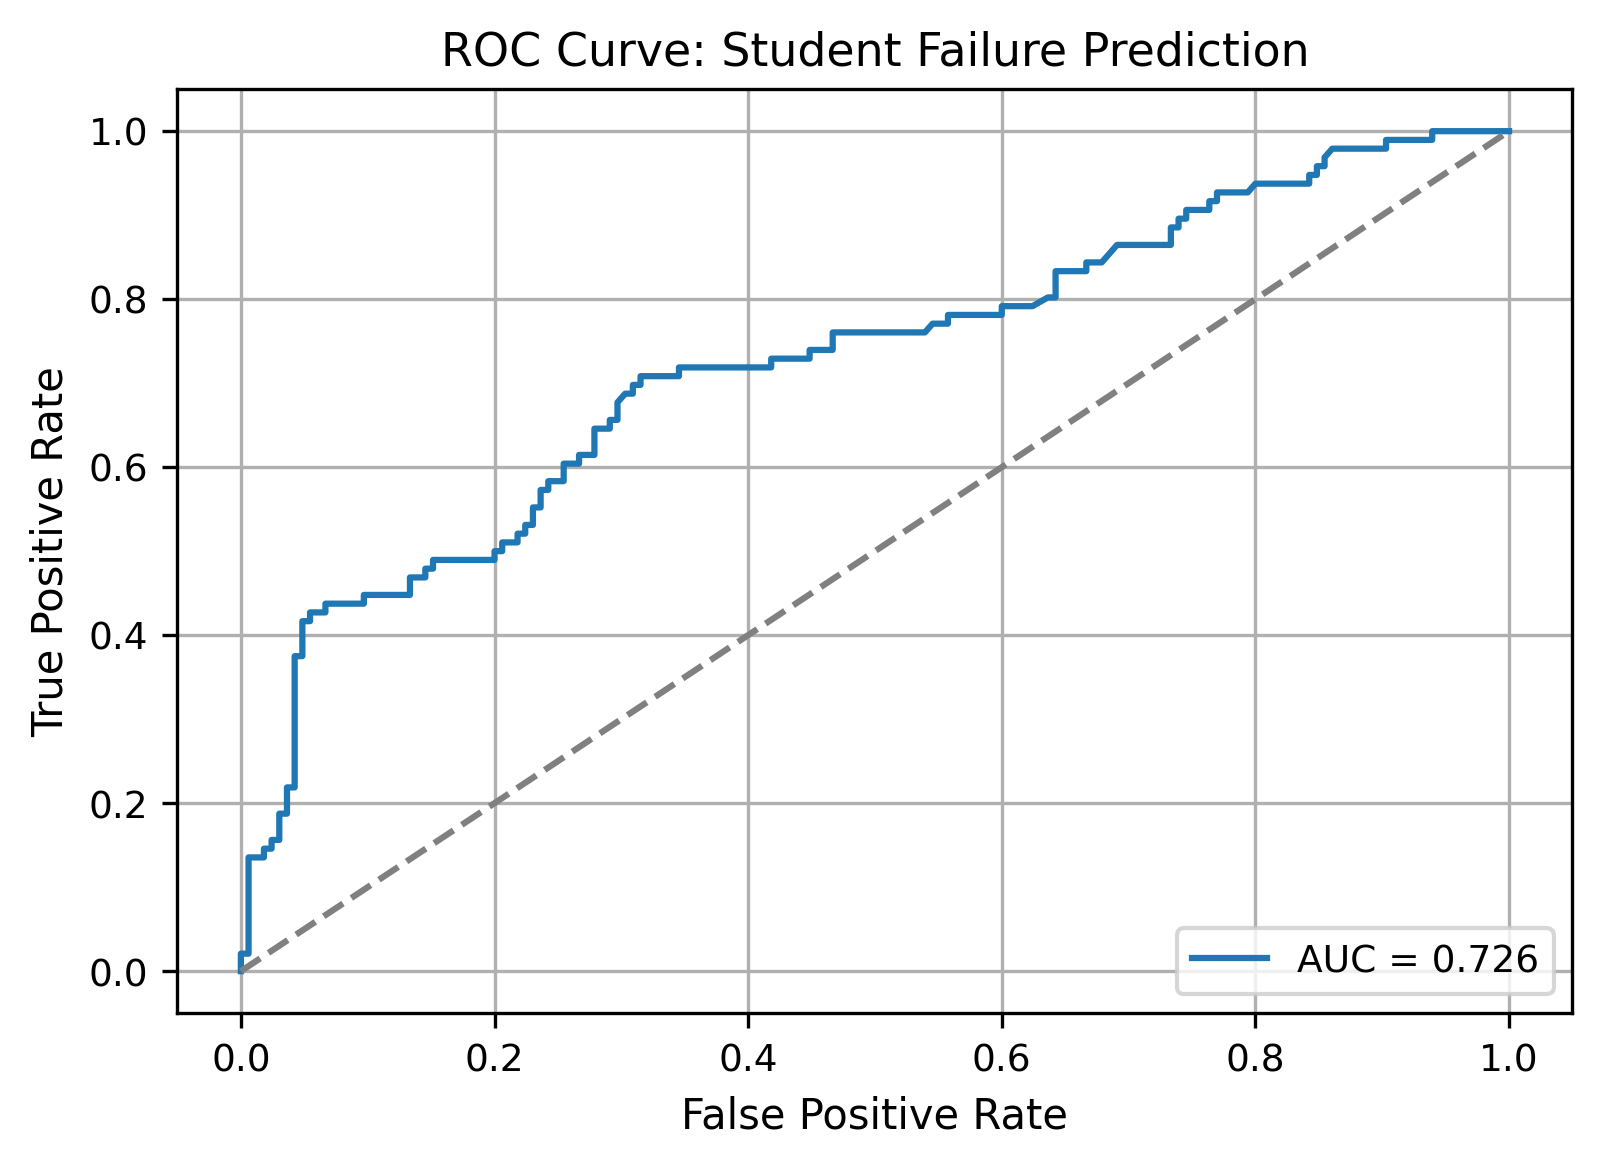

In [12]:
# Cell: failure_prediction.ipynb

import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    roc_auc_score, roc_curve,
    confusion_matrix, accuracy_score,
    classification_report
)
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt



# 2. Feature engineering
binary_map = {"yes":1, "no":0}
for col in ["famsup","schoolsup","romantic"]:
    df[col] = df[col].map(binary_map)

# Predictors and target
PREDICTORS = ["Walc","Dalc","absences","studytime","failures",
              "famsup","schoolsup","health","romantic"]
X = df[PREDICTORS]
y = (df["G3"] < 11).astype(int)  # 1=fail, 0=pass

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 4. Pipeline: scale + logistic regression
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=10000, solver="lbfgs")
)
pipe.fit(X_train, y_train)

# 5. Predictions & metrics
y_prob = pipe.predict_proba(X_test)[:,1]
y_pred = (y_prob >= 0.5).astype(int)

auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=3)

print(f"AUC:      {auc:.3f}")
print(f"Accuracy: {acc:.3f}")
print("Confusion matrix:\n", cm)
print("\nClassification report:\n", report)

# 6. Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Student Failure Prediction")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
